How can a computer read a text ? 
The Encoding technique

In [27]:
txt = "Today you want to learn transformers! encoding texts"
chars = set(txt)
print(txt, '\n', chars ,type(chars))
chars = list(chars)
print(chars, type(chars))
chars = sorted(chars)
print(chars,type(chars))
print("Size of the vocabulary -> {0}".format(len(chars)))
#same as chars = sorted(list(set(chars)))

Today you want to learn transformers! encoding texts 
 {' ', 'o', 'r', 'x', '!', 'l', 'g', 'a', 'u', 'd', 'm', 'y', 'e', 'c', 'w', 'f', 'i', 's', 't', 'n', 'T'} <class 'set'>
[' ', 'o', 'r', 'x', '!', 'l', 'g', 'a', 'u', 'd', 'm', 'y', 'e', 'c', 'w', 'f', 'i', 's', 't', 'n', 'T'] <class 'list'>
[' ', '!', 'T', 'a', 'c', 'd', 'e', 'f', 'g', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'w', 'x', 'y'] <class 'list'>
Size of the vocabulary -> 21


In [28]:
#Now we need to give a value for each char
#We can use the index in the list to do it so, I'll show using a dictionary {letter: number}
#I can use a encoder that will see the letter, and look for the respective index in the dictionary
# lambda a: b --> a is the argument, b is the functionality, lambda a,b : a + b -> receive a and b and returns the sum 
# will bring the index for each char for the string passed

letter_to_index = {letter:index for index,letter in enumerate(chars)}
index_to_letter = {index:letter for index,letter in enumerate(chars)}
display(letter_to_index)
display(index_to_letter)

encode = lambda string : [letter_to_index[char] for char in string] 
decode = lambda char: ''.join([index_to_letter[index] for index in char])
print(encode("test"))
print(decode(encode("test")))


{' ': 0,
 '!': 1,
 'T': 2,
 'a': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'i': 9,
 'l': 10,
 'm': 11,
 'n': 12,
 'o': 13,
 'r': 14,
 's': 15,
 't': 16,
 'u': 17,
 'w': 18,
 'x': 19,
 'y': 20}

{0: ' ',
 1: '!',
 2: 'T',
 3: 'a',
 4: 'c',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'i',
 10: 'l',
 11: 'm',
 12: 'n',
 13: 'o',
 14: 'r',
 15: 's',
 16: 't',
 17: 'u',
 18: 'w',
 19: 'x',
 20: 'y'}

[16, 6, 15, 16]
test


The problem with this kind of encode is that it is 1 by 1, so one letter at time need to be reviewed. 
In order to save processing, we can encode entire words, instead of letters
/### Encoding by words

In [29]:
import pandas as pd
import numpy as np

text = {"text":["You are starting to learn transformers",
                "Maybe you are starting to like it"]}

text = pd.DataFrame(text)
display(text)

#now we can get a table showing which words appeared in each phrase
text["text"].str.get_dummies(" ")

,text
0,You are starting to learn transformers
1,Maybe you are starting to like it


,Maybe,You,are,it,learn,like,starting,to,transformers,you
0,0,1,1,0,1,0,1,1,1,0
1,1,0,1,1,0,1,1,1,0,1


The problem is that we would create a huge matrix for every word that exists, and we'll be only using only a few spots, because not 1% of the words will appear in the phrases. 
So we cannot use letter by letter, nor have so much blank space using the entire words. The solution is to break the words in small pieces called tokens

https://github.com/openai/tiktoken

In [30]:
#!source /venv_ai_study/bin/activate
#!pip install tiktoken --break-system-packages

In [31]:
import tiktoken
#gpt2 is a pre-trained model having all the tokens I might need

enc = tiktoken.get_encoding("gpt2") #encode of gpt2 works with pdf ?
enc.encode("Let's learn how to use transform")

[5756, 338, 2193, 703, 284, 779, 6121]

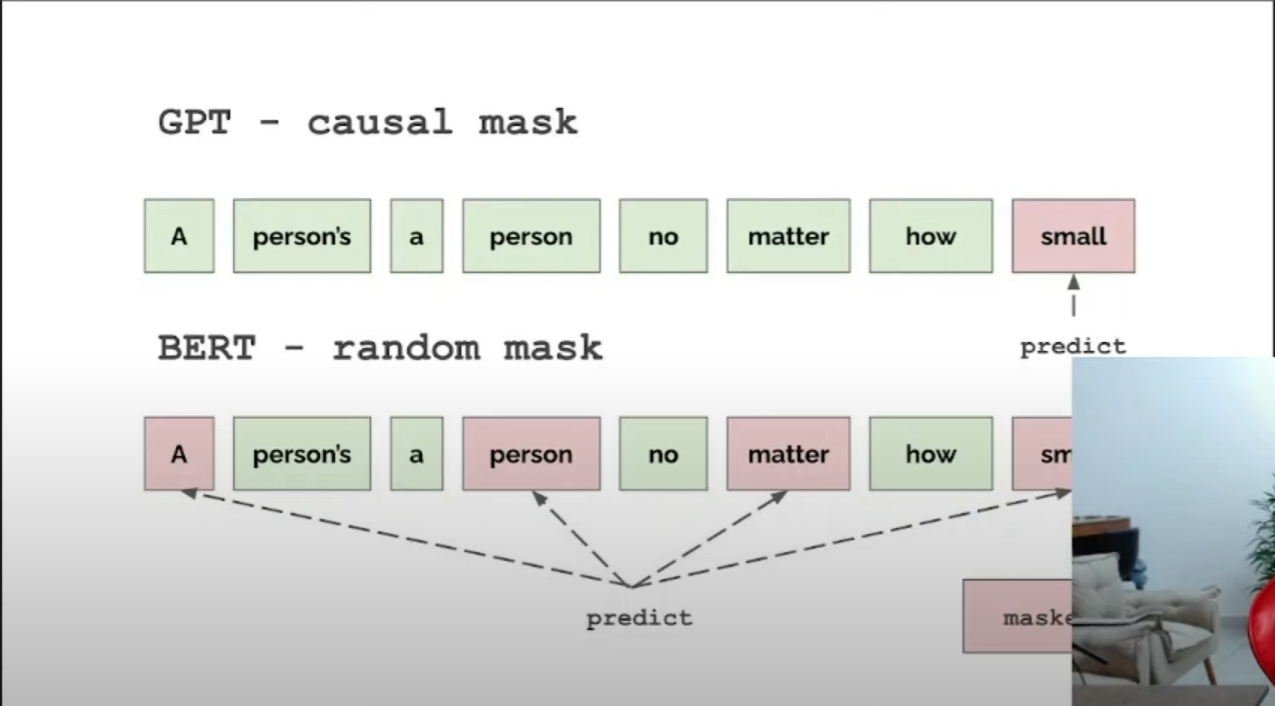

The goal is to predict the next token in the list based in the previous one 

In [32]:
text = encode("Text encoding test")
print(text)
#For example, when  it is 2, we need to predict 6

[2, 6, 19, 16, 0, 6, 12, 4, 13, 5, 9, 12, 8, 0, 16, 6, 15, 16]


In [33]:
#Using GPT model
#It generates the same amount of iterations than the length of the list

for i in range(len(text) -1):
    x = text[:i]
    y = text[i]
    if x != []:
        print(f'When the data is: {x} the prediction is {y}')

When the data is: [2] the prediction is 6
When the data is: [2, 6] the prediction is 19
When the data is: [2, 6, 19] the prediction is 16
When the data is: [2, 6, 19, 16] the prediction is 0
When the data is: [2, 6, 19, 16, 0] the prediction is 6
When the data is: [2, 6, 19, 16, 0, 6] the prediction is 12
When the data is: [2, 6, 19, 16, 0, 6, 12] the prediction is 4
When the data is: [2, 6, 19, 16, 0, 6, 12, 4] the prediction is 13
When the data is: [2, 6, 19, 16, 0, 6, 12, 4, 13] the prediction is 5
When the data is: [2, 6, 19, 16, 0, 6, 12, 4, 13, 5] the prediction is 9
When the data is: [2, 6, 19, 16, 0, 6, 12, 4, 13, 5, 9] the prediction is 12
When the data is: [2, 6, 19, 16, 0, 6, 12, 4, 13, 5, 9, 12] the prediction is 8
When the data is: [2, 6, 19, 16, 0, 6, 12, 4, 13, 5, 9, 12, 8] the prediction is 0
When the data is: [2, 6, 19, 16, 0, 6, 12, 4, 13, 5, 9, 12, 8, 0] the prediction is 16
When the data is: [2, 6, 19, 16, 0, 6, 12, 4, 13, 5, 9, 12, 8, 0, 16] the prediction is 6
Whe

In [34]:
#BERT model will mask parts of the list and try to predict 
# which token would come at that position
# this is used to train a BERT model

from random import randint

for i in range(len(text)):
    x = text
    y = text.copy()

    idx_mask = randint(0,len(text)-1)
    y[idx_mask] = '<mask>'

    print(f'When the data is: {x} the prediction is {y}')

When the data is: [2, 6, 19, 16, 0, 6, 12, 4, 13, 5, 9, 12, 8, 0, 16, 6, 15, 16] the prediction is [2, 6, 19, '<mask>', 0, 6, 12, 4, 13, 5, 9, 12, 8, 0, 16, 6, 15, 16]
When the data is: [2, 6, 19, 16, 0, 6, 12, 4, 13, 5, 9, 12, 8, 0, 16, 6, 15, 16] the prediction is ['<mask>', 6, 19, 16, 0, 6, 12, 4, 13, 5, 9, 12, 8, 0, 16, 6, 15, 16]
When the data is: [2, 6, 19, 16, 0, 6, 12, 4, 13, 5, 9, 12, 8, 0, 16, 6, 15, 16] the prediction is [2, 6, 19, 16, 0, 6, 12, 4, '<mask>', 5, 9, 12, 8, 0, 16, 6, 15, 16]
When the data is: [2, 6, 19, 16, 0, 6, 12, 4, 13, 5, 9, 12, 8, 0, 16, 6, 15, 16] the prediction is [2, 6, 19, 16, 0, 6, 12, '<mask>', 13, 5, 9, 12, 8, 0, 16, 6, 15, 16]
When the data is: [2, 6, 19, 16, 0, 6, 12, 4, 13, 5, 9, 12, 8, 0, 16, 6, 15, 16] the prediction is [2, 6, 19, 16, 0, 6, 12, '<mask>', 13, 5, 9, 12, 8, 0, 16, 6, 15, 16]
When the data is: [2, 6, 19, 16, 0, 6, 12, 4, 13, 5, 9, 12, 8, 0, 16, 6, 15, 16] the prediction is [2, 6, 19, 16, '<mask>', 6, 12, 4, 13, 5, 9, 12, 8, 0, 16,

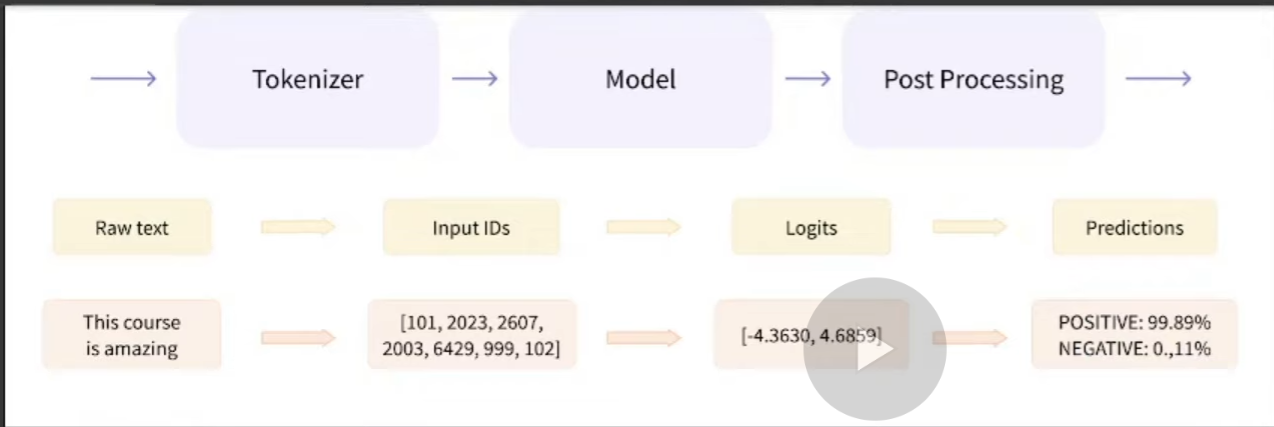

Let's make a BERT model called ROBERTA

******************** FIRST STEP ********************

Training part.
Training our tokenizer, getting all the vocabulary of the text.
Didn't transform into tokens yet

In [35]:
#https://huggingface.co/
!pip install transformers[torch]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Let's use a book of Nietzsche to train the ROBERTA

In [36]:
#we'll get a robust text, but not too big
!wget -O ./sample_data/crepusculoDosIdolos.txt https://raw.githubusercontent.com/ferrarimarlon/NietzscheLLM/main/crepusculoDosIdolos.txt


--2025-03-17 22:45:50--  https://raw.githubusercontent.com/ferrarimarlon/NietzscheLLM/main/crepusculoDosIdolos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


200 OK
Length: 162098 (158K) [text/plain]
Saving to: ‘./sample_data/crepusculoDosIdolos.txt’

./sample_data/crepu 100%[===================>] 158.30K  --.-KB/s    in 0.06s   

2025-03-17 22:45:50 (2.43 MB/s) - ‘./sample_data/crepusculoDosIdolos.txt’ saved [162098/162098]



In [37]:
PATH = './sample_data/'
training_data = 'crepusculoDosIdolos.txt'

In [38]:
#This training get all the vocabulary of the text, not transform into token yet
#we need to choose the tokenizer
from tokenizers import ByteLevelBPETokenizer

#Initialize a ByteLevelBPETokenizer
tokenizer = ByteLevelBPETokenizer() #Creating the object
#if it find a frquency of 2 times, it join the tokens. Vocabulary of 52000 tokens
tokenizer.train(files=[PATH+training_data], vocab_size=52_000, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "/s",
    "<unk>",
    "<mask>"
])


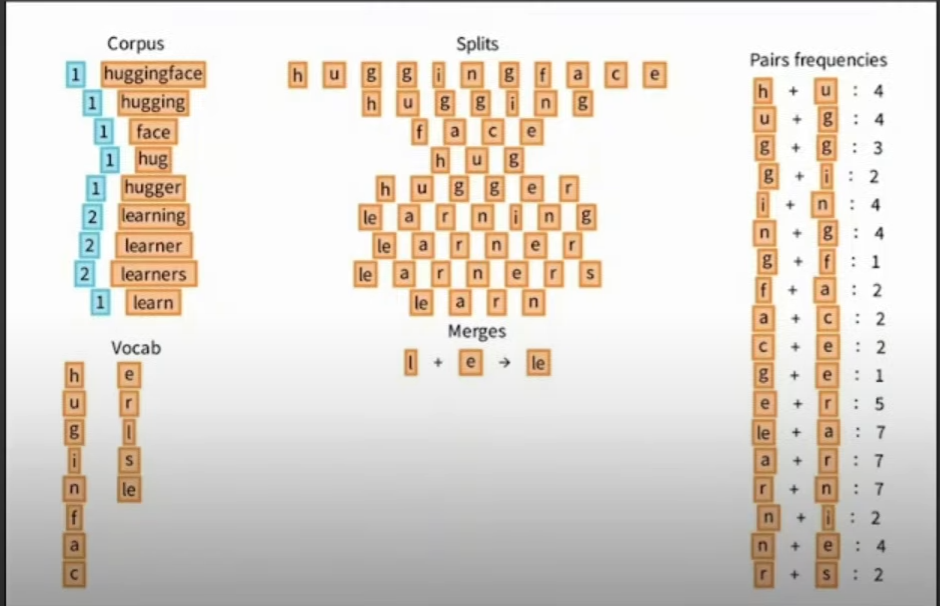

In [39]:
#testing the model of tokenizer after trainning
display(tokenizer.encode("testing phrase").ids)
display(tokenizer.decode([ 519, 88, 295, 75, 266, 76, 268, 308]))

[519, 88, 295, 75, 266, 76, 268, 308]

'testing phrase'

In [40]:
#Our model already have a tokenizer built from the data we have input
#vocab.json, list of the tokens ordered by frequency - convert tokens to IDs
#merges.txt - map texts to tokens - How they joined tokens to build the vocab

!rm -r ./sample_data/RAW_MODEL
!mkdir ./sample_data/RAW_MODEL
tokenizer.save_model(PATH+'RAW_MODEL')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


['./sample_data/RAW_MODEL/vocab.json', './sample_data/RAW_MODEL/merges.txt']

******************** SECOND STEP ********************
Processing part.
Transform the vocabulary into tokens. 
--> Building our tokenizer

In [41]:
#Create a tokenizer based on the BPE Algorithm
#If I would use BERT, would be like below, But I'll use RoBERTa
'''
from tokenizers.implementations import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing #the model. Bert, Gpt, etc

tokenizer = ByteLevelBPETokenizer(
    PATH+'RAW_MODEL'+"vocab.json",
    PATH+'RAW_MODEL'+"/merges.txt"
)

tokenizer._tokenizer.post_processor = BertProcessing(
    ("</s>", tokenizer.token_to_id("</s>")),
    ("<s>", tokenizer.token_to_id("<s>"))
)

tokenizer.enable_truncation(max_length=512)
'''

from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained(PATH+'RAW_MODEL', max_len=512)


******************** THIRD STEP ********************
Now we have the pretrained raw model
and we've created the Roberta Tokenizer

--> Building our Transformer

In [42]:
from transformers import RobertaConfig #Trained by google

config = RobertaConfig(
    vocab_size=52_000,
    max_position_embeddings=512,
    num_attention_heads=12,
    num_hidden_layers=6,
    type_vocab_size=1,
)

from transformers import RobertaForMaskedLM
model = RobertaForMaskedLM(config=config)

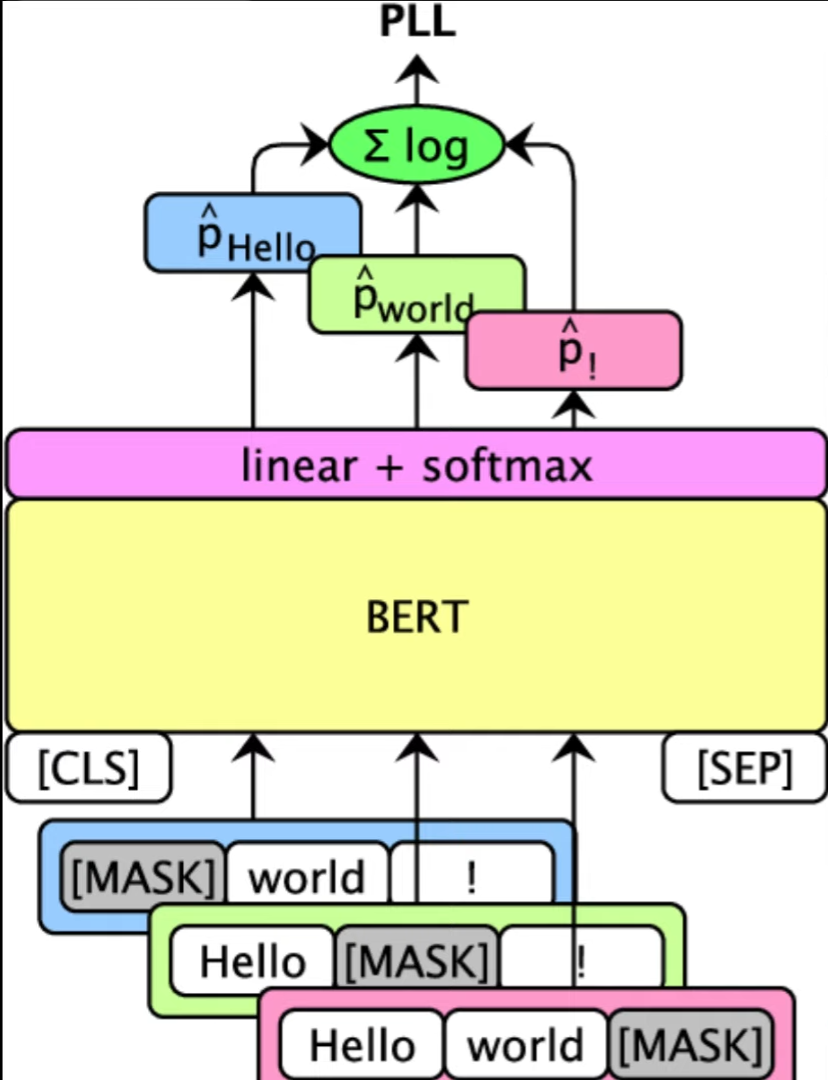

In [43]:
#How much parameters has our neural network
model.num_parameters()

83502880

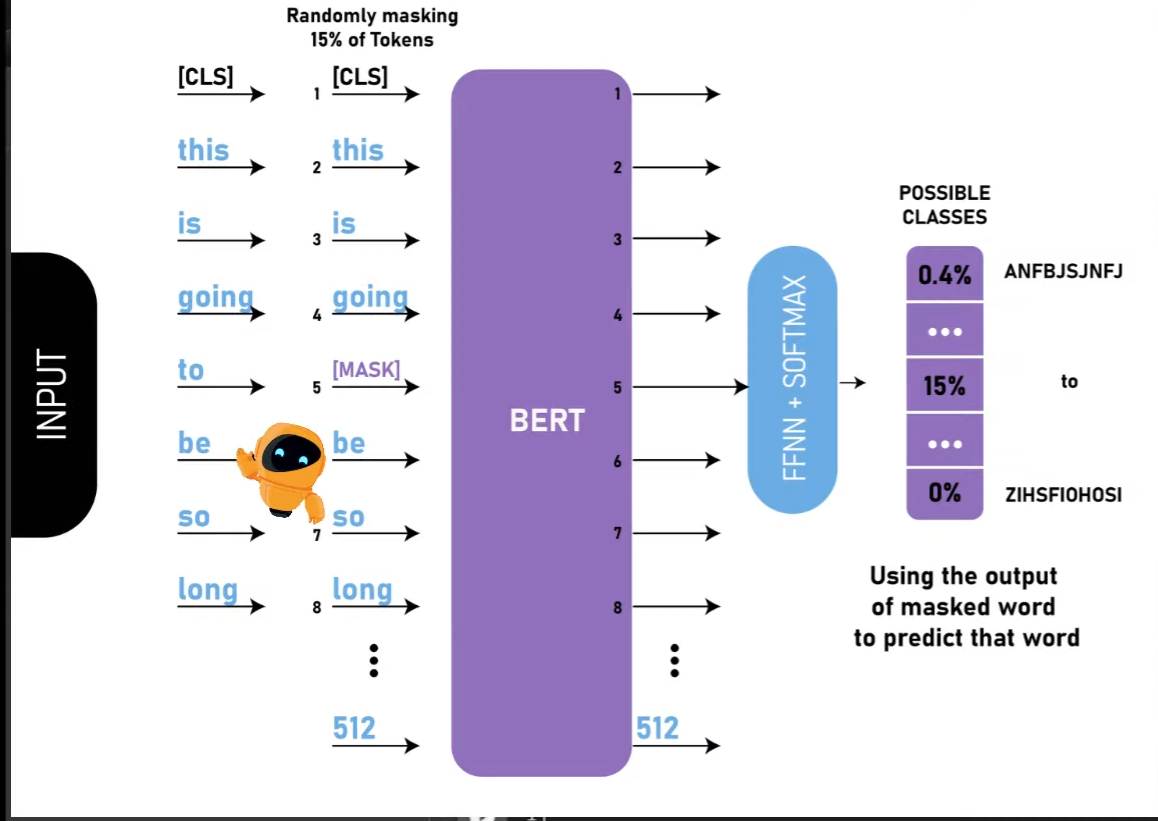

******************** FOURTH STEP ********************
--> Creating the tokenized Dataset

In [44]:
#Way to load a raw file as dataset
from transformers import LineByLineTextDataset

dataset = LineByLineTextDataset(
    tokenizer = tokenizer,
    file_path=PATH+training_data,
    block_size=128
)

/home/rhuan/rhuan/coding/python/jupyter_lab/ipynb_ai_studies/venv_ai/lib/python3.12/site-packages/transformers/data/datasets/language_modeling.py:119: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [45]:
#checking
dataset.examples[:2]

[{'input_ids': tensor([   0,   69,  276, 1154,  341,  306,  277,  273,   73,  271,  446, 1058,
            18,  352,   35, 1155,  262, 1058,  300,  527, 2240,   35, 5008])},
 {'input_ids': tensor([   0,   83,  358, 1142, 3664, 1816,  272,  687, 2688,  781, 4651,  315,
          2377,  271, 2768, 1635,  285,  811, 2375,  527, 5008])}]

In [46]:
tokenizer.decode(dataset.examples[7]['input_ids'])

'<s>na escola bélica da vida — o que não me faz morrer me torna mais forte.</s>'

******************** FIFTH STEP ********************

--> Trainning our model

In [47]:
'''
Data Collators are strategies of building slots of data
for trainning the model. It creates lists of examples from the dataset
and allows the Pytorch to apply a backpropagation correctly.
Probability = probability of masking entering tokens
'''

from transformers import DataCollatorForLanguageModeling
#0.0 would put no masks, 0.1 means 10 percent of the tokens will have masks
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer , mlm=True, mlm_probability=0.1
)

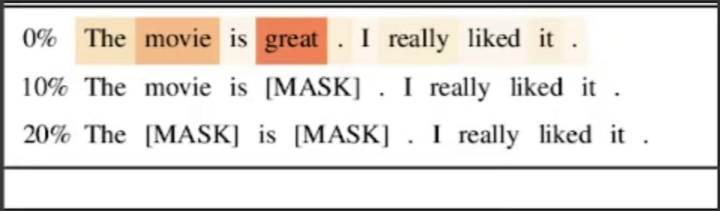

In [48]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir=PATH+'RAW_MODEL',
    overwrite_output_dir=True,
    num_train_epochs=20,
    per_device_train_batch_size=4,
    save_steps=500,
    save_total_limit=1,
    prediction_loss_only=True
) #only the arguments

trainer = Trainer(
    model=model, #RoBERTa
    args=training_args, #args above
    data_collator=data_collator, #the collator we created
    train_dataset=dataset #the dataset we created
) #main class responsible to train the model

In [49]:
#After instance everything above, let's train
trainer.train()

Step,Training Loss
500,7.442900
1000,6.600100


TrainOutput(global_step=1140, training_loss=6.9513392933628015, metrics={'train_runtime': 1652.4589, 'train_samples_per_second': 2.735, 'train_steps_per_second': 0.69, 'total_flos': 146766432643584.0, 'train_loss': 6.9513392933628015, 'epoch': 20.0})

In [50]:
trainer.save_model(PATH+'RAW_MODEL')

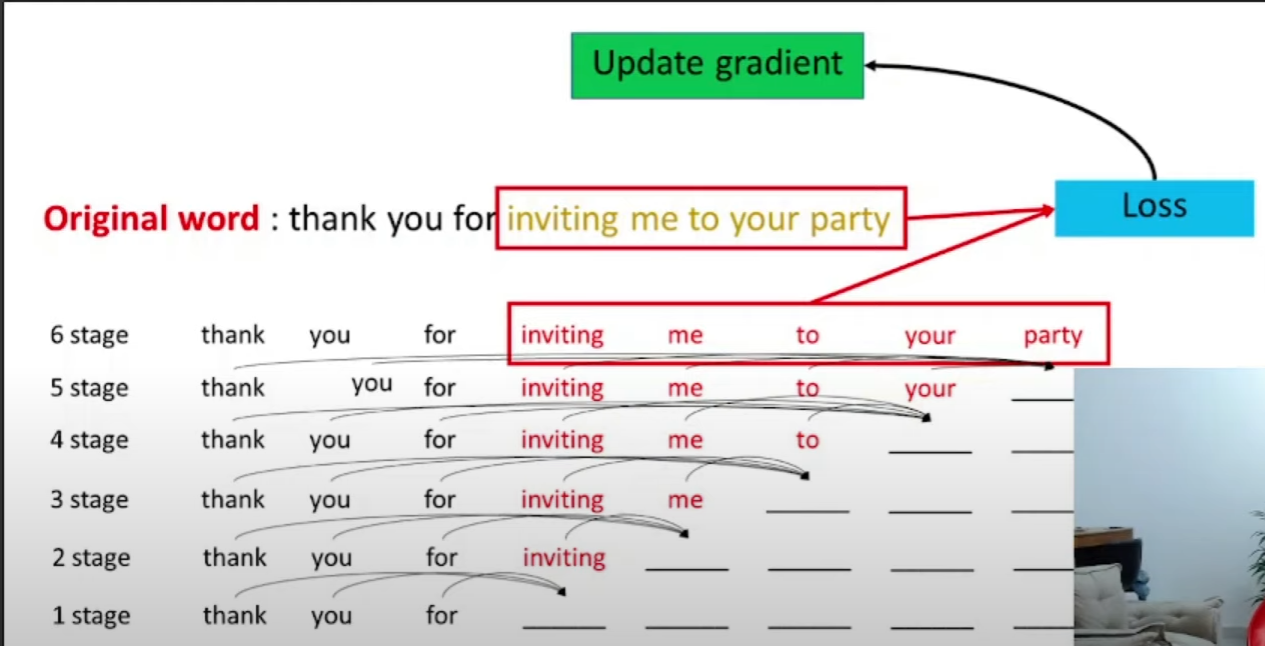

******************** LAST STEP ********************

Testing our model

In [51]:
from transformers import pipeline
fill_mask = pipeline(
    "fill-mask", #we want it to predict and fill the data it can't see
    model=PATH+'RAW_MODEL',
    tokenizer=PATH+'RAW_MODEL'
)

Device set to use cpu


In [52]:
#it show us the top 5 predictions, the book is in portuguese
text = 'Eu digo que o amor é <mask>'
fill_mask(text)

[{'score': 0.055497534573078156,
  'token': 18,
  'token_str': '.',
  'sequence': 'Eu digo que o amor é.'},
 {'score': 0.030995674431324005,
  'token': 285,
  'token_str': ' que',
  'sequence': 'Eu digo que o amor é que'},
 {'score': 0.02542046271264553,
  'token': 16,
  'token_str': ',',
  'sequence': 'Eu digo que o amor é,'},
 {'score': 0.024209005758166313,
  'token': 35,
  'token_str': '?',
  'sequence': 'Eu digo que o amor é?'},
 {'score': 0.02115614153444767,
  'token': 414,
  'token_str': ' —',
  'sequence': 'Eu digo que o amor é —'}]

In [53]:
text = 'O <mask> da moral: basear na lógica dos fracos'
fill_mask(text)

[{'score': 0.02963382937014103,
  'token': 276,
  'token_str': ' o',
  'sequence': 'O o da moral: basear na lógica dos fracos'},
 {'score': 0.028032267466187477,
  'token': 285,
  'token_str': ' que',
  'sequence': 'O que da moral: basear na lógica dos fracos'},
 {'score': 0.02074657939374447,
  'token': 263,
  'token_str': ' e',
  'sequence': 'O e da moral: basear na lógica dos fracos'},
 {'score': 0.019744329154491425,
  'token': 35,
  'token_str': '?',
  'sequence': 'O? da moral: basear na lógica dos fracos'},
 {'score': 0.01704464852809906,
  'token': 18,
  'token_str': '.',
  'sequence': 'O. da moral: basear na lógica dos fracos'}]